In [1]:
%%time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import sqlite3
import sqlalchemy

CPU times: user 1.73 s, sys: 582 ms, total: 2.31 s
Wall time: 3.6 s


In [2]:
%%time
radacct = pd.read_csv('radacct 2.csv', dtype=object)
radacct.shape
radacct.head(3)


CPU times: user 2min 42s, sys: 1min 32s, total: 4min 15s
Wall time: 4min 56s


,radacctid,acctsessionid,acctuniqueid,username,realm,nasipaddress,nasportid,nasporttype,acctstarttime,acctupdatetime,...,calledstationid,callingstationid,acctterminatecause,servicetype,framedprotocol,framedipaddress,framedipv6address,framedipv6prefix,framedinterfaceid,delegatedipv6prefix
0,1,00000018,1af6b39080572ab9a9e924f6b0929356,b3b114de96b0dce6a355d39a6b957b65,NaN,77f64d99c9ae4fa,Uniq-Sess-ID1,Virtual,2020-07-19 15:54:04,2020-07-19 15:54:04,...,NaN,NaN,Port-Error,Framed-User,PPP,e78c393dc6a5e77,NaN,NaN,NaN,NaN
1,2,0000001F,7fe1449dceaffa6099f04a3100c0cf39,b273a4f8038954375f9041e021597f2a,NaN,77f64d99c9ae4fa,Uniq-Sess-ID4,Virtual,2020-07-19 15:54:11,2020-07-19 15:54:11,...,NaN,NaN,Port-Error,Framed-User,PPP,1d8d7e50cccc815,NaN,NaN,NaN,NaN
2,3,0000001B,535318acbcb19fd1808a630778bda871,50ac85c47e5b32f77585a149fd1984fc,NaN,77f64d99c9ae4fa,Uniq-Sess-ID2,Virtual,2020-07-19 15:54:11,2020-07-19 15:54:12,...,NaN,NaN,Port-Error,Framed-User,PPP,64315bc43eaae8d,NaN,NaN,NaN,NaN


In [3]:
radacct.shape

(26231595, 28)

In [4]:
%%time
radacct_extract = radacct[['acctstarttime', 'acctstoptime','acctinputoctets', 'acctoutputoctets']]
radacct_extract.shape

CPU times: user 1.97 s, sys: 7.9 s, total: 9.88 s
Wall time: 11.5 s


(26231595, 4)

In [5]:
%%time 
# save as csv file
radacct_extract.to_csv('radacct_extract.csv')


CPU times: user 1min 16s, sys: 4.33 s, total: 1min 20s
Wall time: 1min 21s


In [6]:
%%time
#calling the new file
radacct_extract = pd.read_csv('radacct_extract.csv', index_col =0)
radacct_extract.head(3)

CPU times: user 26.5 s, sys: 9.6 s, total: 36.1 s
Wall time: 39.3 s


,acctstarttime,acctstoptime,acctinputoctets,acctoutputoctets
0,2020-07-19 15:54:04,2020-07-20 12:19:52,145570,331594
1,2020-07-19 15:54:11,2020-07-19 16:24:04,3518,7770
2,2020-07-19 15:54:11,2020-07-19 15:57:12,100427,390874


In [7]:
%%time
radacct_extract['acctstarttime2'] = pd.to_datetime(radacct_extract['acctstarttime'])
radacct_extract['acctstoptime2'] = pd.to_datetime(radacct_extract['acctstoptime'])
radacct_extract['newStarttime'] = radacct_extract['acctstarttime2'].dt.strftime('%d-%m-%Y')
radacct_extract['newStoptime'] = radacct_extract['acctstoptime2'].dt.strftime('%d-%m-%Y')
radacct_extract['month'] = radacct_extract['acctstarttime2'].dt.strftime('%B')
radacct_extract['week_number'] = radacct_extract['acctstarttime2'].dt.isocalendar().week
radacct_extract['year'] = radacct_extract['acctstarttime2'].dt.strftime('%y')
radacct_extract.head(3)

CPU times: user 9min 50s, sys: 9.37 s, total: 9min 59s
Wall time: 10min 4s


,acctstarttime,acctstoptime,acctinputoctets,acctoutputoctets,acctstarttime2,acctstoptime2,newStarttime,newStoptime,month,week_number,year
0,2020-07-19 15:54:04,2020-07-20 12:19:52,145570,331594,2020-07-19 15:54:04,2020-07-20 12:19:52,19-07-2020,20-07-2020,July,29,20
1,2020-07-19 15:54:11,2020-07-19 16:24:04,3518,7770,2020-07-19 15:54:11,2020-07-19 16:24:04,19-07-2020,19-07-2020,July,29,20
2,2020-07-19 15:54:11,2020-07-19 15:57:12,100427,390874,2020-07-19 15:54:11,2020-07-19 15:57:12,19-07-2020,19-07-2020,July,29,20


In [8]:
Daily_uploads = radacct_extract.groupby('newStarttime').sum()
Daily_uploads

,acctinputoctets,acctoutputoctets,week_number
newStarttime,,,
01-01-2021,14788124362816,197012477878917,1731033
01-02-2021,12849477378293,172126036750679,197715
01-03-2021,14595387254028,183428853413898,493308
01-04-2021,15574927756694,205997488555666,697827
01-05-2021,15190711073132,211465145579785,874208
...,...,...,...
31-08-2020,12534834290044,173696142124121,2223468
31-08-2021,11002389061279,151931775621718,1619520
31-10-2020,9705893742125,137781903825041,1620256


In [9]:
%%time
wkly_uploads = radacct_extract.groupby(['week_number','year'], as_index=False).sum()
wkly_uploads

CPU times: user 2.48 s, sys: 921 ms, total: 3.4 s
Wall time: 3.44 s


,week_number,year,acctinputoctets,acctoutputoctets
0,1,21,95761591925580,1275731660068332
1,2,21,90157718934394,1242458559142802
2,3,21,103111769777795,1396025171921468
3,4,21,95647667623384,1312131166384484
4,5,21,95731827134909,1301456204273497
...,...,...,...,...
69,50,20,97661451833171,1278207242985388
70,51,20,99197341012975,1275429094927858
71,52,20,98476462461420,1256900030345610
72,53,20,60544346231888,774342247877677


In [10]:
#Converting Account Octet from megabyte to gigabyte
wkly_uploads['acctinputoctets'] = wkly_uploads['acctinputoctets']/1000
wkly_uploads['acctoutputoctets'] = wkly_uploads['acctoutputoctets']/1000 

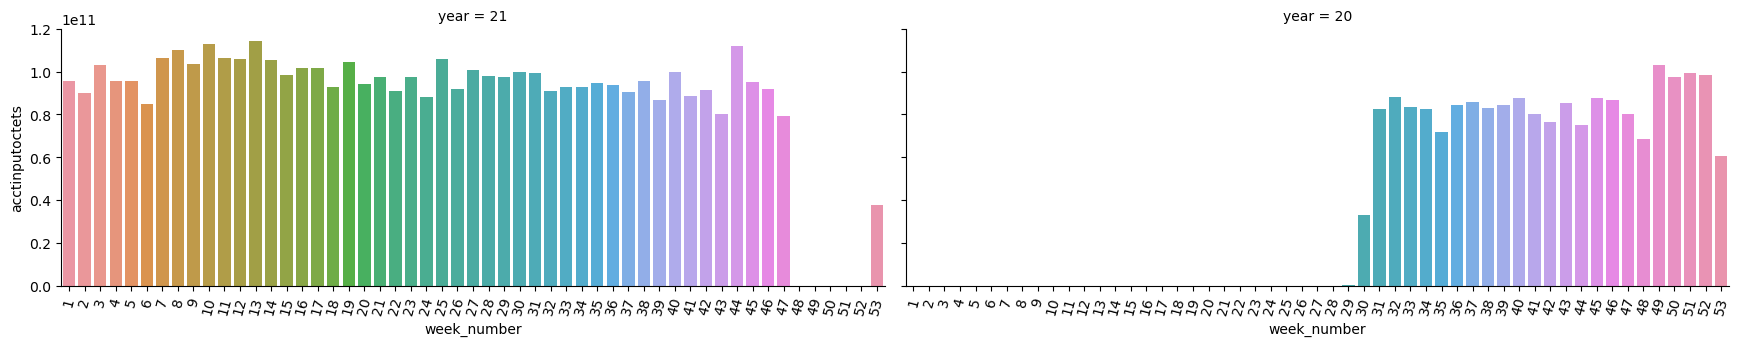

In [11]:

 wklyPlot= sns.catplot(x="week_number", y="acctinputoctets", col="year",
                 data=wkly_uploads, kind="bar",
                 height=3.5, aspect=2.5)
wklyPlot= wklyPlot.set_xticklabels(rotation=75)




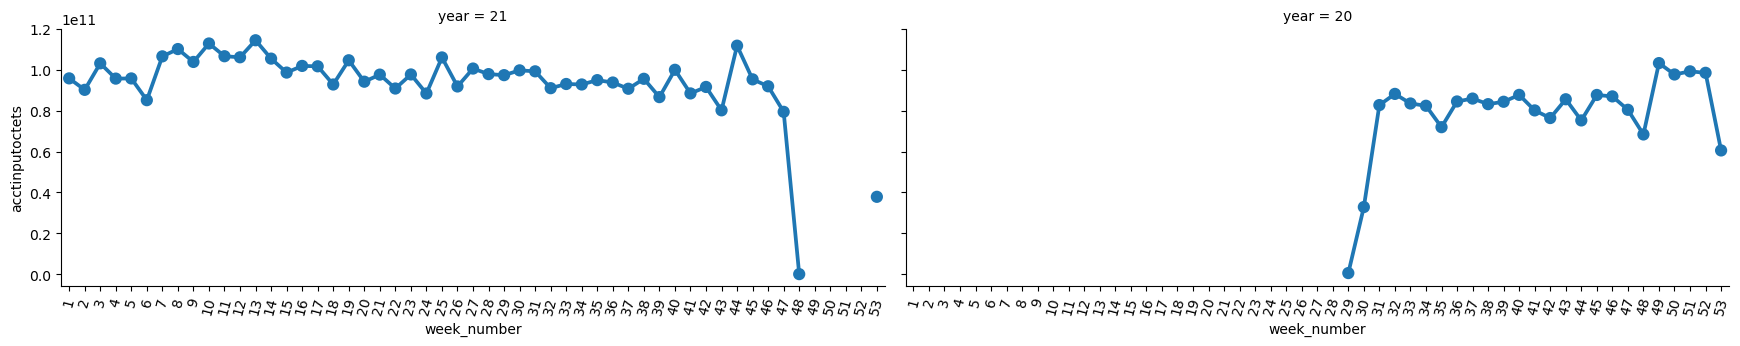

In [12]:
wklyPlot= sns.catplot(x="week_number", y="acctinputoctets", col="year",
                 data=wkly_uploads, kind="point",
                 height=3.5, aspect=2.5)
wklyPlot= wklyPlot.set_xticklabels(rotation=75)

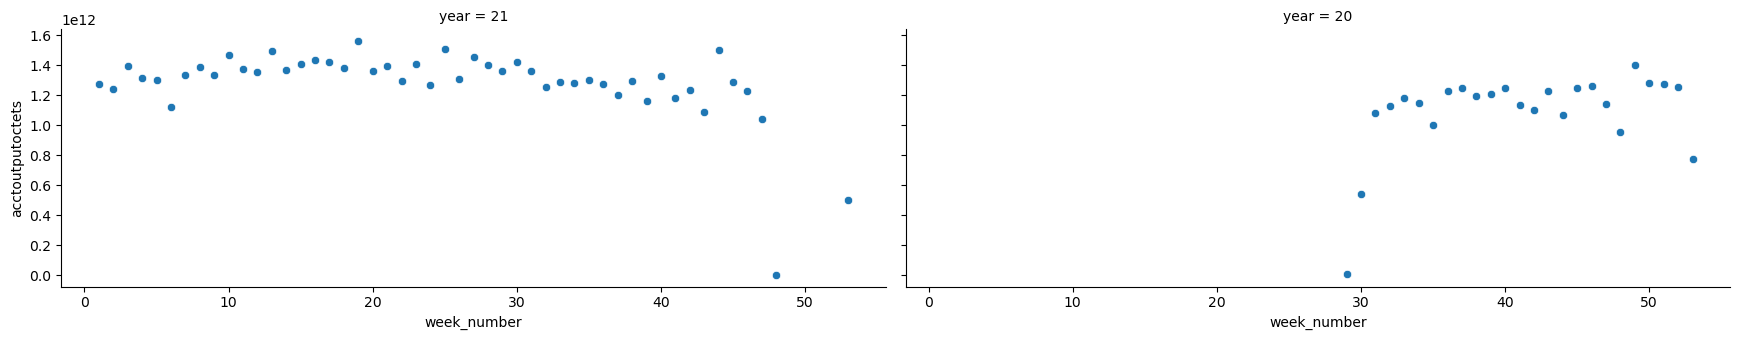

In [13]:
#Scatter plot weekly
WklyPlot = sns.relplot(x="week_number", y="acctoutputoctets", col="year",
                 data=wkly_uploads, kind="scatter",
                 height=3.5, aspect=2.5)
wklyPlot.set_xticklabels(rotation=75)

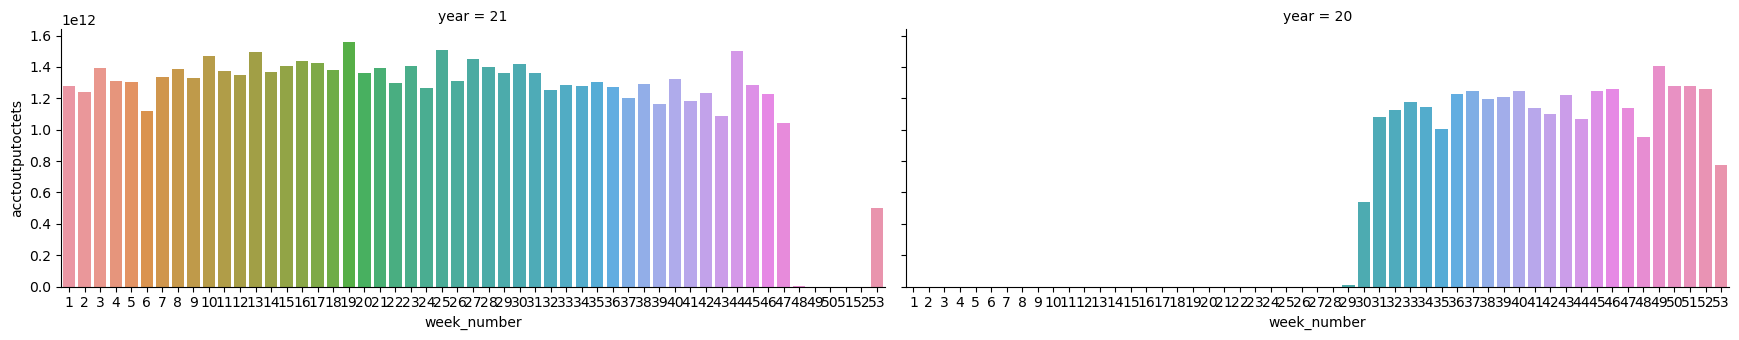

In [14]:
WklyPlot = sns.catplot(x="week_number", y="acctoutputoctets", col="year",
                 data=wkly_uploads, kind="bar",
                 height=3.5, aspect=2.5)
wklyPlot.set_xticklabels(rotation=5)


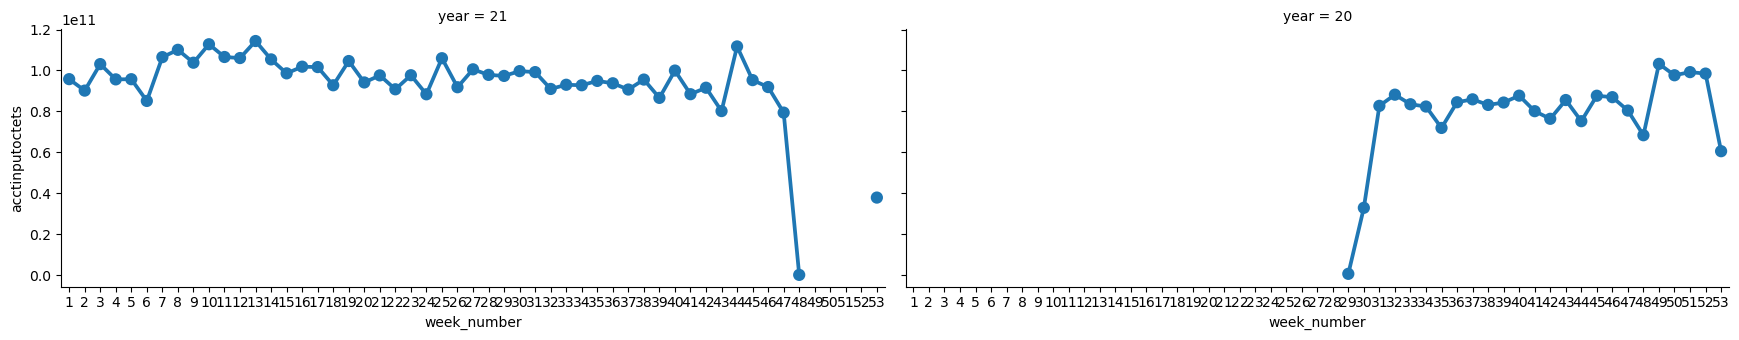

In [15]:
WklyPlot = sns.catplot(x="week_number", y="acctinputoctets", col="year",
                 data=wkly_uploads, kind="point",
                 height=3.5, aspect=2.5)
wklyPlot.set_xticklabels(rotation=5)

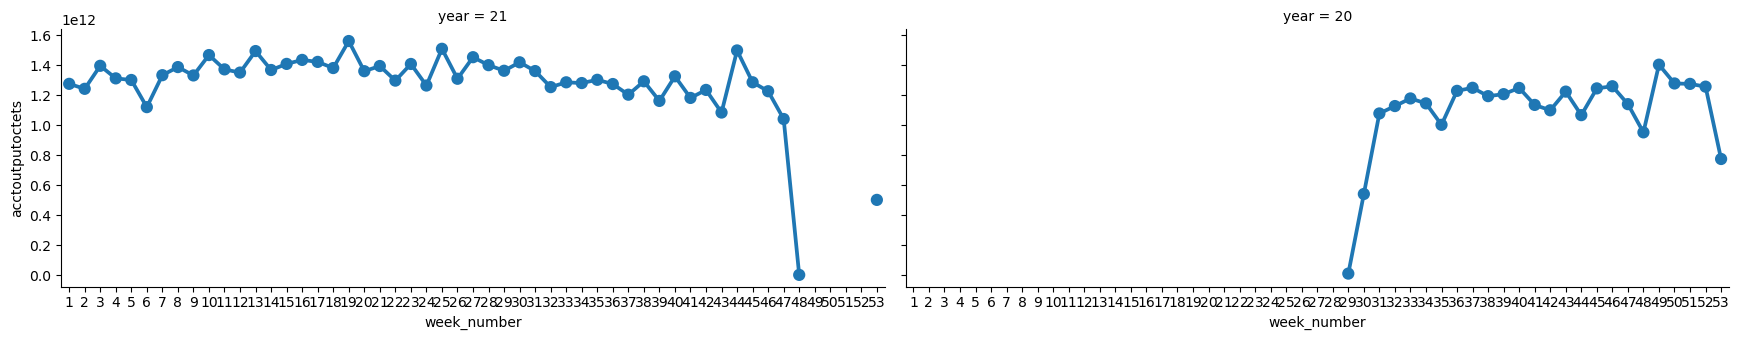

In [16]:
WklyPlot = sns.catplot(x="week_number", y="acctoutputoctets", col="year",
                 data=wkly_uploads, kind="point",
                 height=3.5, aspect=2.5)
wklyPlot.set_xticklabels(rotation=75)

In [17]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [18]:
wkly_uploads2 = pd.concat([wkly_uploads, wkly_uploads], axis=0)
wkly_uploads2.reset_index(inplace=True)
wkly_uploads2.drop('index', axis=1, inplace=True)

wkly_uploads2.iloc[74:148,2] = wkly_uploads2.iloc[0:74,3]

wkly_uploads2.iloc[74:148,3] = 'output'
wkly_uploads2.iloc[0:74,3] = 'input'

wkly_uploads2.columns = ['week_number', 'year', 'value', 'acctoctets']
wkly_uploads2

,week_number,year,value,acctoctets
0,1,21,95761591925.6,input
1,2,21,90157718934.4,input
2,3,21,103111769777.8,input
3,4,21,95647667623.4,input
4,5,21,95731827134.9,input
...,...,...,...,...
143,50,20,1278207242985.4,output
144,51,20,1275429094927.9,output
145,52,20,1256900030345.6,output
146,53,20,774342247877.7,output


In [19]:
radacct_july = Daily_uploads[Daily_uploads.index.str.contains('07-2020', na=False)]
radacct_july/1000

,acctinputoctets,acctoutputoctets,week_number
newStarttime,,,
19-07-2020,604357207.5,9670671513.9,66.8
20-07-2020,2388940466.3,39146556769.0,146.7
21-07-2020,1540657740.0,25863112668.1,147.9
22-07-2020,4548922396.3,76525643106.3,304.1
23-07-2020,4387230072.5,73574048189.7,511.1
24-07-2020,2246300586.4,38208643060.8,375.9
25-07-2020,2404705287.8,38542815756.5,471.1
26-07-2020,15358406182.7,248946863350.9,1604.2
27-07-2020,11558661859.9,183810985929.2,1668.9


In [20]:
%%time
mnthly_uploads = radacct_extract.groupby(['month','year'], as_index=False).sum()
mnthly_uploads

CPU times: user 3.79 s, sys: 1.4 s, total: 5.19 s
Wall time: 5.48 s


,month,year,acctinputoctets,acctoutputoctets,week_number
0,April,21,443005320453078,6071925195962864,23530581
1,August,20,369464566041585,5015662060665938,42517367
2,August,21,413235690601587,5695286549011881,52955982
3,December,20,424921150913217,5516372733084327,59539192
4,February,21,397459168673524,5142732776894354,9897334
5,January,21,422555619482457,5727811459383463,8414678
6,July,20,85210538090408,1239965776360767,10320901
7,July,21,434733464811140,6200103323693720,47718895
8,June,21,407880630609755,5837397015490369,37095694
9,March,21,479896584755613,6183680865013027,18870028


In [21]:
#Converting Account Octet from megabyte to gigabyte
mnthly_uploads['acctinputoctets'] = mnthly_uploads['acctinputoctets']/1000 
mnthly_uploads['acctoutputoctets'] = mnthly_uploads['acctoutputoctets']/1000 

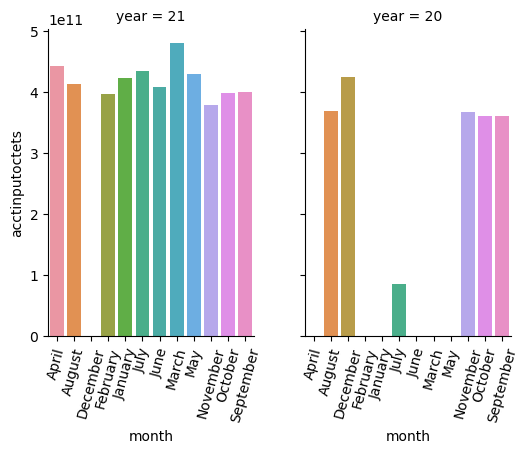

In [22]:
MnthlyPlot = sns.catplot(x="month", y="acctinputoctets", col="year",
                 data=mnthly_uploads, kind="bar",
                 height=4, aspect=.7)
MnthlyPlot.set_xticklabels(rotation=75)

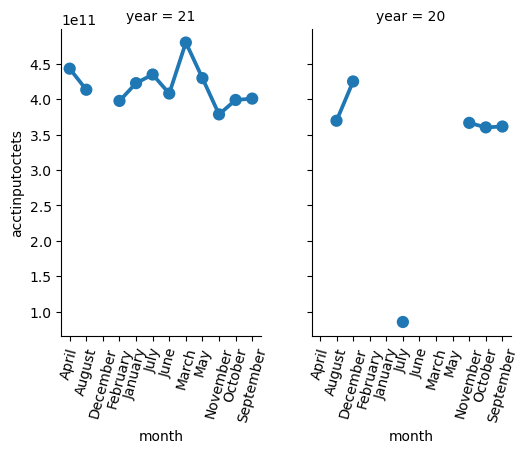

In [23]:
MnthlyPlot = sns.catplot(x="month", y="acctinputoctets", col="year",
                 data=mnthly_uploads, kind="point",
                 height=4, aspect=.7)
MnthlyPlot.set_xticklabels(rotation=75)

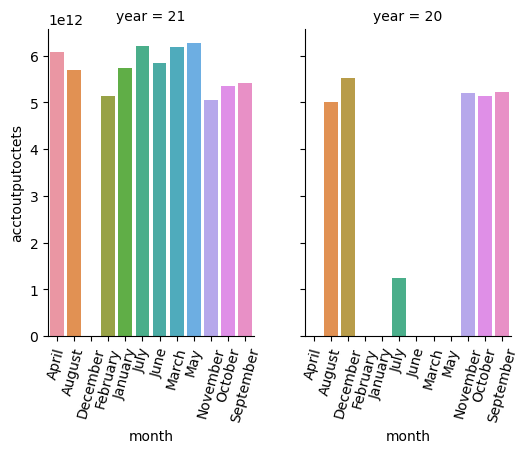

In [24]:
MnthlyPlot = sns.catplot(x="month", y="acctoutputoctets", col="year",
                 data=mnthly_uploads, kind="bar",
                 height=4, aspect=.7)
MnthlyPlot.set_xticklabels(rotation=75)


In [25]:
mnthly_uploads2 = pd.concat([mnthly_uploads, mnthly_uploads], axis=0)
mnthly_uploads2.reset_index(inplace=True)
mnthly_uploads2.drop('index', axis=1, inplace=True)

mnthly_uploads2.iloc[17:34,2] = mnthly_uploads2.iloc[0:17,3]

mnthly_uploads2.iloc[17:34,3] = 'output'
mnthly_uploads2.iloc[0:17,3] = 'input'

mnthly_uploads2.columns = ['month', 'year', 'value', 'acctoctets', 'week_number']
mnthly_uploads2

,month,year,value,acctoctets,week_number
0,April,21,443005320453.1,input,23530581
1,August,20,369464566041.6,input,42517367
2,August,21,413235690601.6,input,52955982
3,December,20,424921150913.2,input,59539192
4,February,21,397459168673.5,input,9897334
5,January,21,422555619482.5,input,8414678
6,July,20,85210538090.4,input,10320901
7,July,21,434733464811.1,input,47718895
8,June,21,407880630609.8,input,37095694
9,March,21,479896584755.6,input,18870028


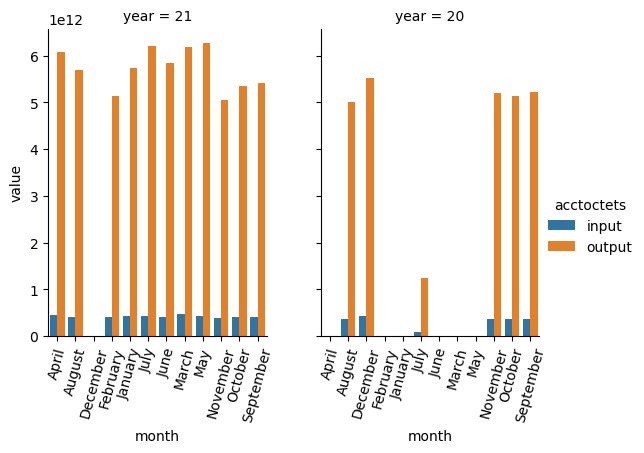

In [26]:
MonthlyPlot = sns.catplot(x="month", y="value",
                 hue="acctoctets", col="year",
                 data=mnthly_uploads2, kind="bar",
                 height=4, aspect=.7)
MonthlyPlot.set_xticklabels(rotation=75)

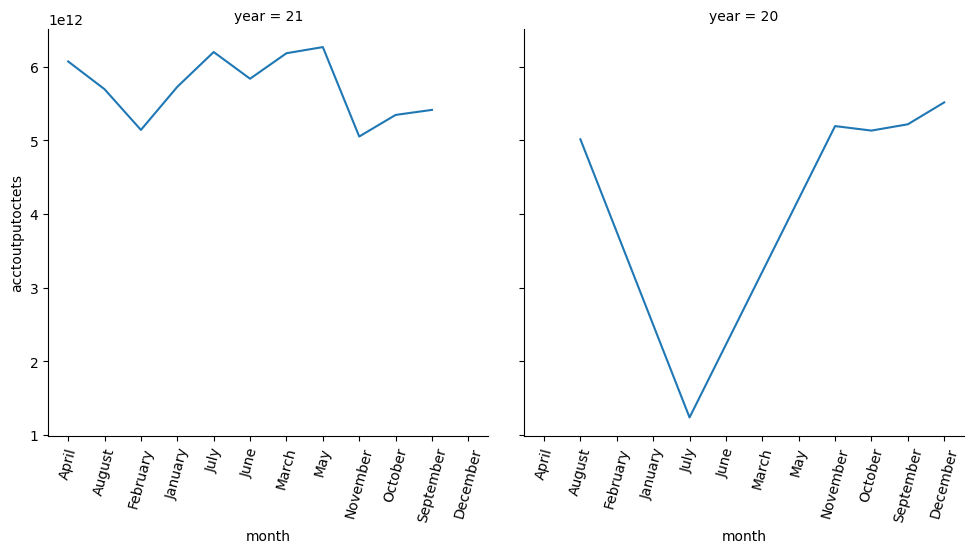

In [29]:
#lingraph for monthly distriution
MnthlyPlot = sns.relplot(x="month", y="acctoutputoctets", col="year",
                 data=mnthly_uploads, kind="line",markers=True)
MnthlyPlot.set_xticklabels(rotation=75)
                

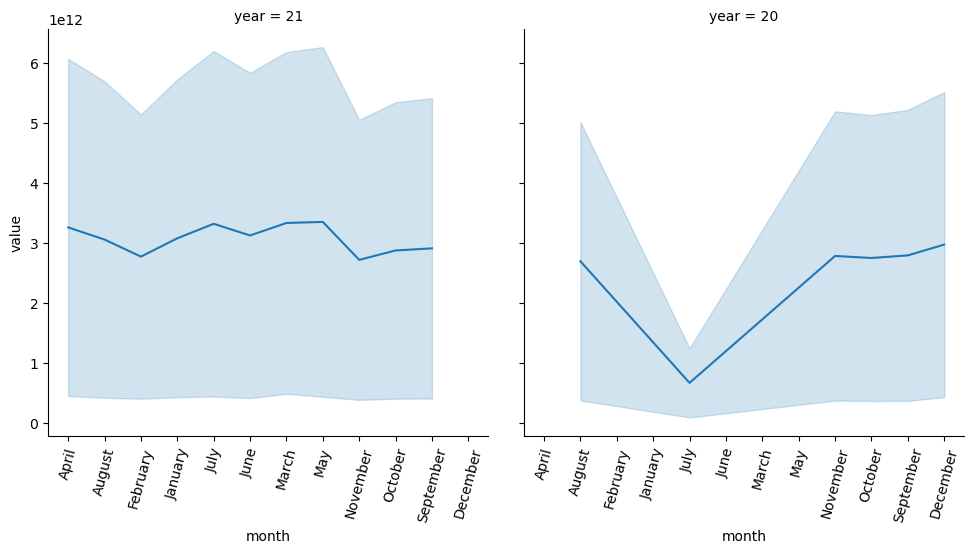

In [30]:
#line graph for weekly usage
MnthlyPlot = sns.relplot(x="month", y="value", col="year",
                 data=mnthly_uploads2, kind="line")
MnthlyPlot.set_xticklabels(rotation=75)

In [31]:
uploads_2020 = mnthly_uploads.groupby('year').sum()
uploads_2020

,acctinputoctets,acctoutputoctets,week_number
year,,,
20,1967413360133.1,27319494894137.0,275245652
21,4606354690781.8,62940043857636.2,532154605


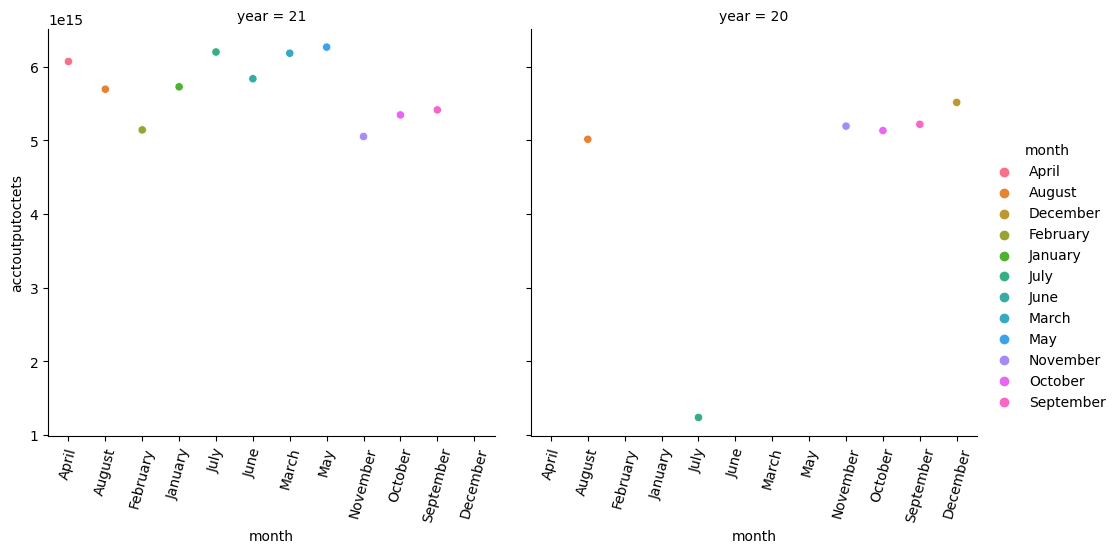

In [151]:
#monthly plot on scatterplot

MnthlyPlot = sns.relplot(x="month", y="acctoutputoctets", col="year",
                 data=mnthly_uploads, kind="scatter", hue="month")
MnthlyPlot.set_xticklabels(rotation=75)



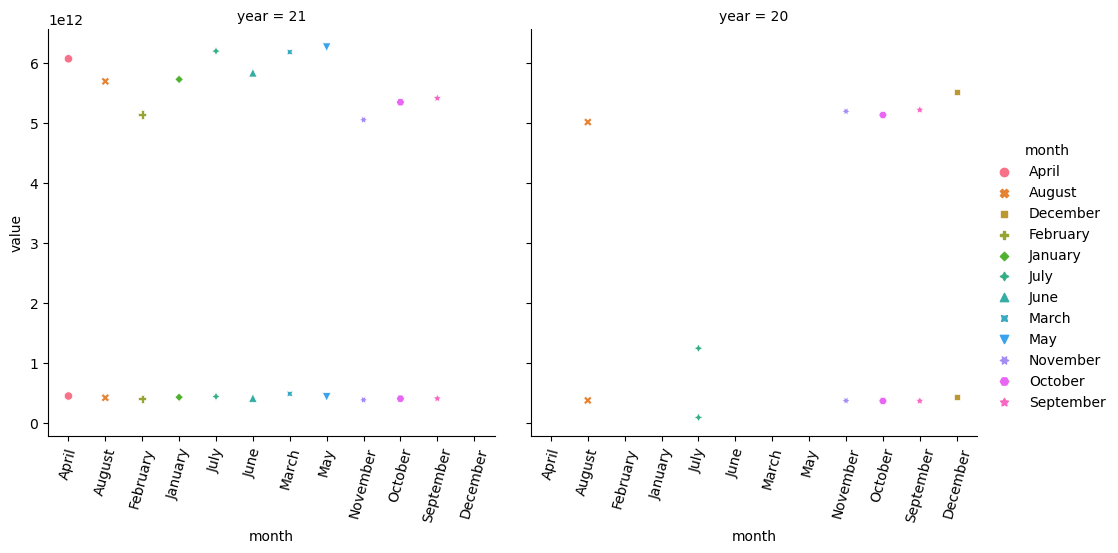

In [33]:
MnthlyPlot = sns.relplot(x="month", y="value", col="year",
                 data=mnthly_uploads2, kind="scatter", hue="month", style="month")
MnthlyPlot.set_xticklabels(rotation=75)

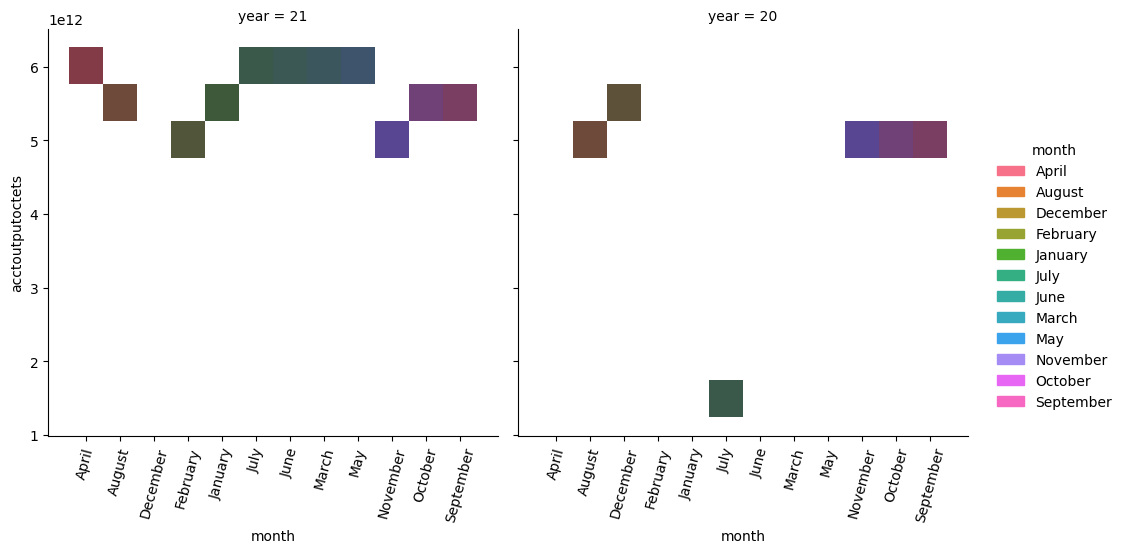

In [34]:
#histogram of weekly uploads showing distribution

MnthlyPlot = sns.displot(x="month", y="acctoutputoctets",col ="year",
               kind="hist", hue="month", data=mnthly_uploads)
MnthlyPlot.set_xticklabels(rotation=75)


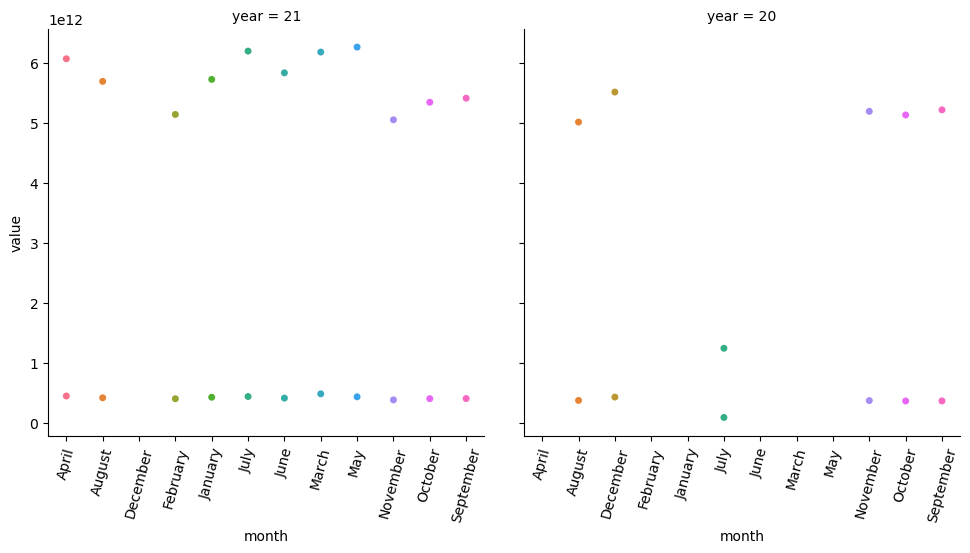

In [35]:
#categorigal startsa from here
MnthlyPlot = sns.catplot(x="month", y="value", col="year",
                 data=mnthly_uploads2, kind="swarm", hue="month")
MnthlyPlot.set_xticklabels(rotation=75)

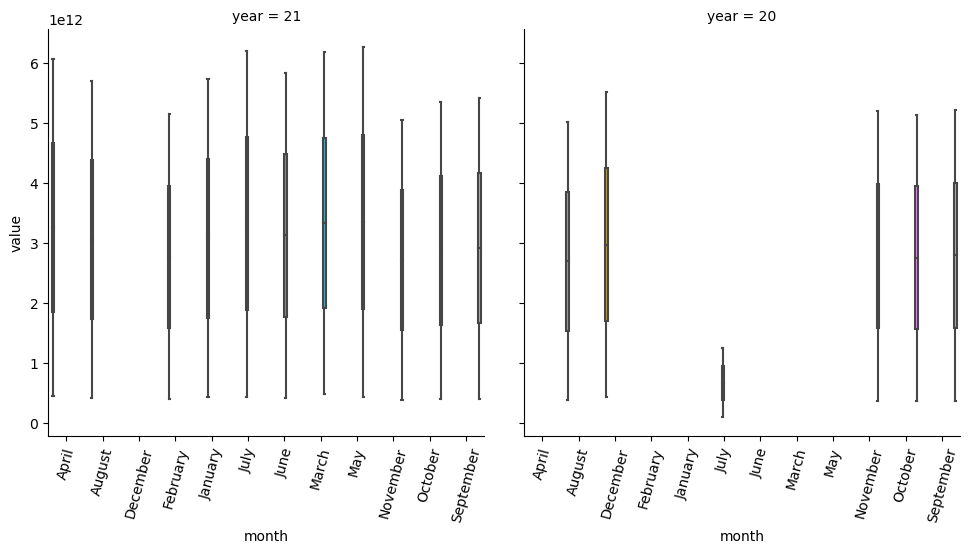

In [137]:

MnthlyPlot = sns.catplot(x="month", y="value", col="year",
                 data=mnthly_uploads2, kind="box", hue="month",)
MnthlyPlot.set_xticklabels(rotation=75)

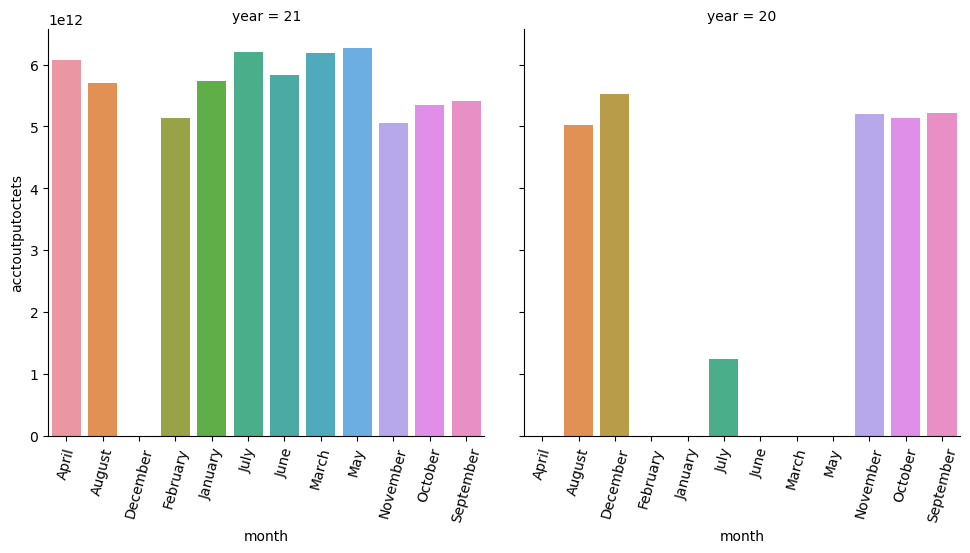

In [37]:
MnthlyPlot = sns.catplot(x="month", y="acctoutputoctets", col="year",
                 data=mnthly_uploads, kind="bar")
MnthlyPlot.set_xticklabels(rotation=75)



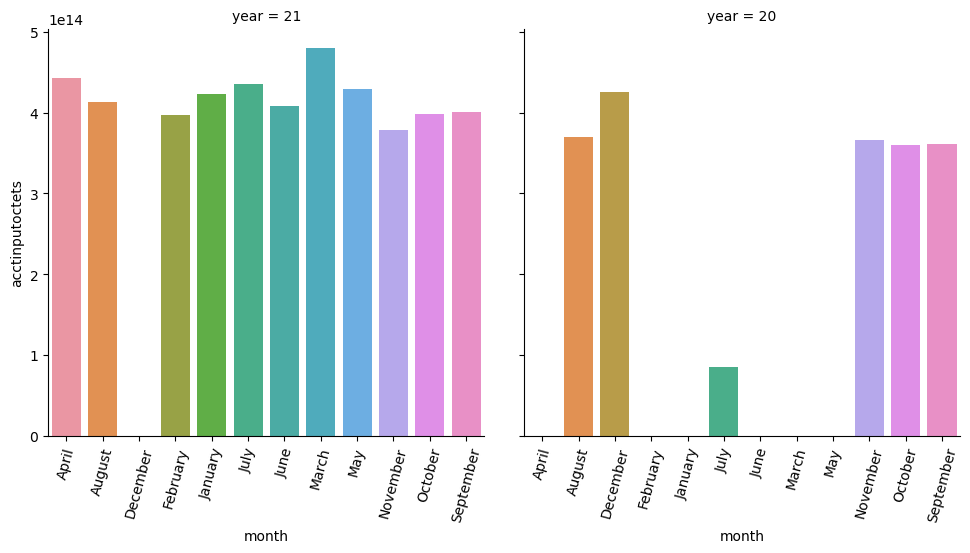

In [146]:
MnthlyPlot = sns.catplot(x="month", y="acctinputoctets", col="year",
                 data=mnthly_uploads, kind="bar")
MnthlyPlot.set_xticklabels(rotation=75)

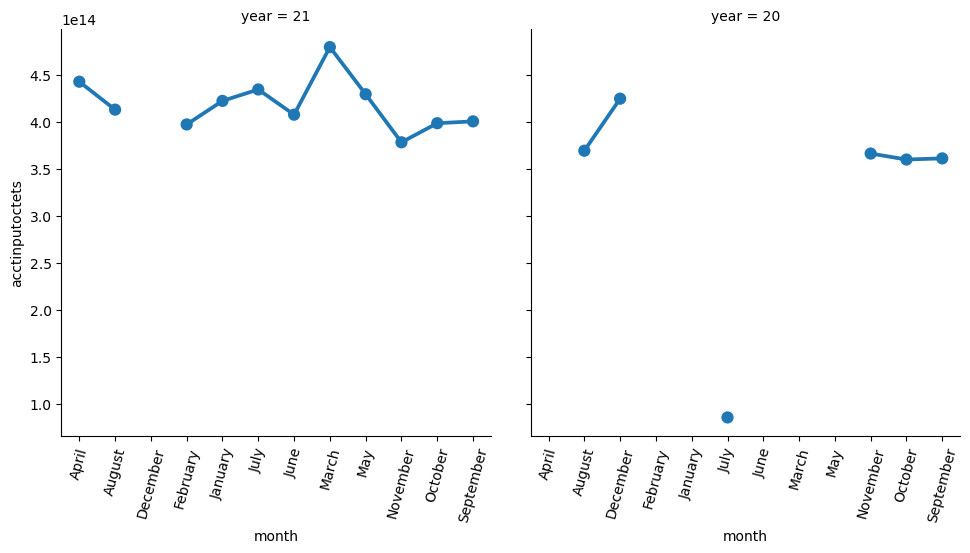

In [147]:
MnthlyPlot = sns.catplot(x="month", y="acctinputoctets", col="year",
                 data=mnthly_uploads, kind="point")
MnthlyPlot.set_xticklabels(rotation=75)